In [132]:
import sys
print(sys.version)
# This is currently made in version 3.9.13

3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]


1. You are a junior developer in a software development company and your team leader wants you to analyze the efficiency of an algorithm, - A1. You have a binary version of the program, that implements the algorithm, available on a virtual machine in a cloud environment. You execute the program with the following inputs and you get the corresponding results:
Input: n = 1; Result = 10 ms (milliseconds)
Input: n = 4; Result = 160 ms
Input: n = 100; Result 10000 ms (10 seconds)
Assume the same functional relationship is valid for every n= 1...∞
Which Big- notation function would you use to describe the time complexity of the algorithm A1? (15 points)

Answer: The task states that the algorithm is being run on a cloud environment. I assume that this is still a local cloud environment and that there is no point in caring about different latencies that often occur when connecting to another server on an external network.
It is clear from the second input that this algorithm has to be higher/worse than a linear big O(n). It is yet not quite exponential. The time taken to execute the function increases rapidly as the input size "n" increases, indicating a polynomial time complexity of at least O(n^2) (quadratic).


2. Given  the  following  functions  ``n,  sqrt(n),  n^3 + 3n^2",  n!,  log(n),  2n,  n*log(n),  2n^2"``, representing the time complexity of 8 different algorithms, place their Big-Os from the fastest to the slowest. Illustrate by a plot (you can use any tools you want). Explanations: sqrt - square root, * - multiplication,! - factorial. (10 points)

In [133]:
import numpy
# Some global lambdas that will be used alot
LOG_N = lambda n: numpy.math.log(n)
SQRT_N = lambda n: numpy.math.sqrt(n)
LINEAR = lambda n: n
LINEAR_2 = lambda n: n*2
NLOGN = lambda n: n*(numpy.math.log(n))
QUADRATIC_TIMES_2 = lambda n: 2*(n**2)
CUBIC_PLUS_QUADRATIC = lambda n: n**3 + 3*(n**2)
FACTORIAL = lambda n: numpy.math.gamma(n+1) # math.factorial can't use real numbers

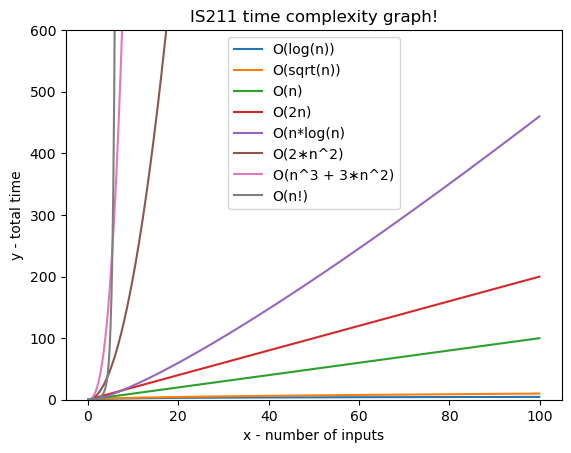

In [134]:
import matplotlib.pyplot as plt
def compactTimeComp2():
    #This is the amount of coordinates to be created
    length = 1000 # OverflowError if length is higher than 171, while multiplier is 1
    #I added the multiplier to be able to use more coordinates, and thus a smoother curve
    multiplier = 0.1
    # We need arrays for matplotlib to plot points
    # xLine is the one line all the algorithms use
    xLine = []
    logN = []           # log(n)
    sqrt = []           # sqrt(n)
    linear = []         # n
    doubleLinear = []   # 2n
    quasilinear = []    # O(n log(n))
    #quadratic = []
    #exponential = []
    quadraticTimesTwo = [] # O(2∗n^2)
    cubicPlusQuadratic = []
    factorial = []
    for i in range(1, length):
        n = i * multiplier
        xLine.append(n)
        logN.append(LOG_N(n))
        sqrt.append(SQRT_N(n))
        linear.append(LINEAR(n)) # The linear lambda is pointless, but I will still use it
        doubleLinear.append(LINEAR_2(n))
        quasilinear.append(NLOGN(n))
        #quadratic.append(n**2)
        quadraticTimesTwo.append(QUADRATIC_TIMES_2(n))
        cubicPlusQuadratic.append(CUBIC_PLUS_QUADRATIC(n))
        #exponential.append(2**n)
        factorial.append(FACTORIAL(n))

    # Plotting to graph
    plt.plot(xLine, logN,               label = "O(log(n))")
    plt.plot(xLine, sqrt,               label = "O(sqrt(n))")
    plt.plot(xLine, linear,             label = "O(n)")
    plt.plot(xLine, doubleLinear,       label = "O(2n)")
    plt.plot(xLine, quasilinear,        label = "O(n*log(n)")
    #plt.plot(xLine, quadratic,          label = "n^2 quadratic")
    plt.plot(xLine, quadraticTimesTwo,  label = "O(2∗n^2)")
    plt.plot(xLine, cubicPlusQuadratic, label = "O(n^3 + 3∗n^2)")
    #plt.plot(xLine, exponential,        label = "2^n exponential")
    plt.plot(xLine, factorial,          label = "O(n!)")

    plt.title('IS211 time complexity graph!')   # Giving a title to the graph
    plt.ylim([0, 600])                          # Y axis limit
    plt.xlabel('x - number of inputs')          # Naming the x-axis
    plt.ylabel('y - total time')                # Naming the y-axis
    plt.legend()                                # Show a legend on the plot
    plt.show()                                  # Function to show the plot

compactTimeComp2()

3. Assume that each of the 8 algorithms from part ("2") takes f(n) milliseconds to solve the problem. For each algorithm calculate the largest size n for which the problem can be solved in the following times. - second, minute, hour, day, month, year and century. Discuss. (10 points)

Answer:

Task 3
For the log(n) it is pretty much impossible by using the code further below.
But log is easy to reverse. So here is the answer for what 'n' is when log(n) =
``Second:	10^(1,000)``
``Minute:	10^(60,000)``
``Hour: 	10^(3,600,000)``
``Day: 	    10^(86,400,000)``
``Month: 	10^(2,629,800,000)``
``Year:     10^(31,557,600,000)``
``Century:  10^(31,536,000,000,000)``
Note that these numbers are based on the averages shown below

In [135]:
# Now we need some more globals again
# 1 second = 1000 milliseconds
# 1 minute = 60 seconds = 60,000 milliseconds
# 1 hour = 60 minutes = 3600 seconds = 3600,000 milliseconds
# 1 day = 24 hours = 86400 seconds = 86,400,000 milliseconds
# 1 month (30.44 days) = 2629800 seconds = 2,629,800,000 milliseconds
# 1 year (365.24 days) = 31557600 seconds = 31,557,600,000 milliseconds
# 1 century = 100 years = 31,536,000,000,000 milliseconds
#Note: The number of days in a month and a year can vary, these values are based on an average.
MILLISECOND = 1
SECOND = MILLISECOND * 1000
MINUTE = SECOND * 60
HOUR = MINUTE * 60
DAY = HOUR * 24
MONTH = DAY * 30.44
YEAR = DAY * 365.24
CENTURY = YEAR * 100
SECOND_TO_CENTURY = [SECOND, MINUTE, HOUR, DAY, MONTH, YEAR, CENTURY]

In [136]:
# Task 3
# Calculate 'n' in sqrt(n) = x
for val in SECOND_TO_CENTURY:
    # sqrt(n) = val
    # n = val^2
    # n = val*val
    print(val*val)

1000000
3600000000
12960000000000
7464960000000000
6.916984160256e+18
9.95827586973696e+20
9.95827586973696e+24


sqrt(n):
``Second:	1,000 		        * 1,000``
``Minute:	60,000 		        * 60,000``
``Hour: 	3,600,000 	        * 3,600,000``
``Day: 	    86,400,000 		    * 86,400,000``
``Month: 	2,629,800,000 	    * 2,629,800,000``
``Year: 	31,557,600,000 	    * 31,557,600,000``
``Century:  31,536,000,000,000 	* 31,536,000,000,000``

In [163]:
# Task 3: quadratic and higher
from decimal import Decimal

def isOneSecond(number):
    return number >= SECOND
def isOneMinute(number):
    return number >= MINUTE
def isOneHour(number):
    return number >= HOUR
def isOneDay(number):
    return number >= DAY
def isOneMonth(number):
    return number >= MONTH
def isOneYear(number):
    return number >= YEAR
def isOneCentury(number):
    return number >= CENTURY
def bigNumberConv(number):
    if number > 100_000_000_000_000:
        return "{:.0E}".format(Decimal(number)) # Format number to scientific
    if type(number) is int:
        return number
    if number.is_integer():
        return int(number)
    return "{:.2f}".format(int(number * 100) / 100.0) # this makes it less accurate, but readable

# This is stupid brute force
# Made to favour the higher big O of n :)
# Program will always run less than 6 seconds (MacBook Air M2) (depending on computer and increment value)
def executeBigOTimeCrunch(lambda_expression, incrementValue = 1, label = "No label :("):
    # Just some flags, yes in "wrong" order, but it looks nice
    isSecondExecuted = False
    isMinuteExecuted = False
    isMonthExecuted  = False
    isHourExecuted   = False
    isYearExecuted   = False
    isDayExecuted    = False
    n = 1
    while True:
        number = lambda_expression(n)
        if not isSecondExecuted:
            if isOneSecond(number):
                print("Execution time for function big", label)
                print("Increment value set to:", bigNumberConv(incrementValue))
                print("one Second took",    bigNumberConv(n), "inputs")
                isSecondExecuted = True
        if not isMinuteExecuted:
            if isOneMinute(number):
                print("one Minute took",    bigNumberConv(n), "inputs")
                isMinuteExecuted = True
        if not isHourExecuted:
            if isOneHour(number):
                print("one Hour took",      bigNumberConv(n), "inputs")
                isHourExecuted = True
        if not isDayExecuted:
            if isOneDay(number):
                print("one Day took",       bigNumberConv(n), "inputs")
                isDayExecuted = True
        if not isMonthExecuted:
            if isOneMonth(number):
                print("one Month took",     bigNumberConv(n), "inputs")
                isMonthExecuted = True
        if not isYearExecuted:
            if isOneYear(number):
                print("one Year took",      bigNumberConv(n), "inputs")
                isYearExecuted = True

        if isOneCentury(number):
            print("one Century took",       bigNumberConv(n), "inputs")
            print("")
            print("")
            break # Don't need to loop anymore if this happens

        if n >= 6_000_000 * incrementValue: # Just so I don't mess it up
            print("The time after", bigNumberConv(n), "inputs became", bigNumberConv(number), "milliseconds")
            print("or", numpy.math.floor(number/1000), "seconds")
            print("or", numpy.math.floor(number/1000/60), "minutes")
            print("or", numpy.math.floor(number/1000/60/60), "hours")
            print("or", numpy.math.floor(number/1000/60/60/24), "days")
            print("")
            print("")
            break
        n += incrementValue

In [164]:
# Some lambdas
#executeBigOTimeCrunch(LOG_N,                100**1000,  "log(n)") # No point in trying
#executeBigOTimeCrunch(SQRT_N,               10**19,     "sqrt(n)")
#executeBigOTimeCrunch(LINEAR,               10**5.75,   "O(n)")
#executeBigOTimeCrunch(LINEAR_2,             10**5.45,   "O(n*2)")
#executeBigOTimeCrunch(NLOGN,                1000,       "O(n*(log(n)))") # Not accurate
executeBigOTimeCrunch(QUADRATIC_TIMES_2,    2.1,        "O(2*(n^2))")
executeBigOTimeCrunch(CUBIC_PLUS_QUADRATIC, 0.1,        "O(n^3 + 3*(n^2))")
executeBigOTimeCrunch(FACTORIAL,            0.01,       "O(n!)")

Execution time for function big O(2*(n^2))
Increment value set to: 2.10
one Second took 24.10 inputs
one Minute took 175.29 inputs
one Hour took 1342.89 inputs
one Day took 6574.00 inputs
one Month took 36263.79 inputs
one Year took 125612.50 inputs
one Century took 1256120.20 inputs


Execution time for function big O(n^3 + 3*(n^2))
Increment value set to: 0.10
one Second took 9.09 inputs
one Minute took 38.20 inputs
one Hour took 152.29 inputs
one Day took 441.10 inputs
one Month took 1379.39 inputs
one Year took 3159.09 inputs
one Century took 14666.80 inputs


Execution time for function big O(n!)
Increment value set to: 0.01
one Second took 6.17 inputs
one Minute took 8.18 inputs
one Hour took 9.99 inputs
one Day took 11.31 inputs
one Month took 12.66 inputs
one Year took 13.61 inputs
one Century took 15.32 inputs




In [139]:
# Calculate 'n' in sqrt(n) = x
# Square root of a number(x) is whatever number(y) you have to time by itself to get wanted number(y*y=x)
# We can do the following:
for val in SECOND_TO_CENTURY:
    # sqrt(n) = val
    # n = val^2
    # n = val*val
    print(f'{val*val:,}') # This formatting is equivalent to old python 2.7: '{:,}'.format(val*val)

1,000,000
3,600,000,000
12,960,000,000,000
7,464,960,000,000,000
6.916984160256e+18
9.95827586973696e+20
9.95827586973696e+24


In [140]:
# How to find 'n' in n*log(n)
# Using Newton Raphson method
# Could also use the bisection method
# Will not work if the above code block is not called
TARGET_NAMES = ["Second", "Minute", "Hour", "Day", "Month", "Year", "Century"]
def newtonRaphson(n, target):
    epsilon = 0.00001
    while True:
        newN = n - (NLOGN(n) - target) / (1 + LOG_N(n))
        if abs(n - newN) < epsilon:
            return newN
        n = newN


def printNinNlogN():
    i = 0
    for target in SECOND_TO_CENTURY:
        print(f"{TARGET_NAMES[i]} n = {bigNumberConv(newtonRaphson(100, target))}")
        i += 1
printNinNlogN()

Second n = 190.49
Minute n = 6799.20
Hour n = 286498.96
Day n = 5562845.24
Month n = 140203188.95
Year n = 1493837283.53
Century n = 123558195227.74


In [141]:
# How to find O(n^3 + 3*(n^2))
# Will not work without the square root calculation code block, and global variables for Second to century
def newtonRaphson(n, target):
    epsilon = 0.00001
    while True:
        #f = (n**3 + 3 * n**2 - target)
        #fPrime = (3 * n**2 + 6 * n)
        nNew = n - (CUBIC_PLUS_QUADRATIC(n) - target) / (3 * n**2 + 6 * n)
        if abs(n - nNew) < epsilon:
            return nNew
        n = nNew

def printCubicN():
    i = 0
    for target in SECOND_TO_CENTURY:
        print(f"{TARGET_NAMES[i]} n = {bigNumberConv(newtonRaphson(100, target))}")
        i += 1
printCubicN()

Second n = 9.09
Minute n = 38.17
Hour n = 152.26
Day n = 441.08
Month n = 1379.34
Year n = 3159.07
Century n = 14666.76


4. Find the smallest value of n such that an algorithm whose running time is 144*n2 runs faster than an algorithm whose running time is 2n on the same machine? (10 points)



In [142]:
# Task 4:
# Don't want lambdas now. I could, but won't
def exponential(n):
    return 2**n

def hundredAndFortyFour(n):
    return 144*(n**2)
# Brute force again
for i in range(1, 20):
    expo = exponential(i)
    hundredAnd44 = hundredAndFortyFour(i)
    if hundredAnd44 < expo:
        print("n =", i)
        print("2**n output =", expo)
        print("144*n**2 output =", hundredAnd44)
        print('')
        print(i, "number of inputs before 144n**2 is faster than 2n")
        break

n = 15
2**n output = 32768
144*n**2 output = 32400

15 number of inputs before 144n**2 is faster than 2n


5. The Fibonacci Sequence is the series of numbers:
0, 1, 1, 2, 3, 5, 8, 13, 21, 34, …
The next number is found by adding up the two numbers before it: the 2 is found by adding the two numbers before it (1+1), the 3 is found by adding the two numbers before it (1+2), the 5 is (2+3), and so on! Implement this algorithm in python or Java and find the Big-O function. Discuss. (15 points)


In [ ]:
# Task 5
class FibonacciSequence:
    def __init__(self, num):
        self.fibonacciSequence = [0, 1] # Need a start value
        for unused_i in range(0, num):
            self.fibonacciSequence.append(sum(self.fibonacciSequence[-2:]))   # O(n)

    def print(self):
        print(self.fibonacciSequence)


In [155]:
f = FibonacciSequence(20)
f.print()
# Algorithm is Big O(n) (linear)
# Max value to insert in the FibonacciSequence class is 5345
# The reason for this is that the FibonacciSequence number itself is O(2^n)
# At 5346 and higher the IOPub data rate os exceeded
# This can be edited in the config variable `--NotebookApp.iopub_data_rate_limit`.

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946]


6. Assume an algorithm A2 (linear search) is run on a machine M1 with a speed ratio of 0.1, and an algorithm A3 (binary search) is run on a machine M2 with a speed ratio of 500 (in other words the M1 is on average 5000 times faster than M2).
Define running times for A2 and A3 expressed as a function of n (consider the speed ratio of the machine in a form of a constant in the expression).
Find the time consumed by A2 and A3, respectively executing on M1 and M2. when  the  n  is  approaching  10%.
Discuss  the  results.  What  kind  of  challenges,  related  to asymptotic analysis, can you mention, for choosing between algorithms for a given problem which must be solved on specific hardware? (10 points)


Task 6:
Answer:
Challenges related to asymptotic analysis can be such as the size of the input, hardware and software. Also, alot of the faster time complexities, is often much more complicated.

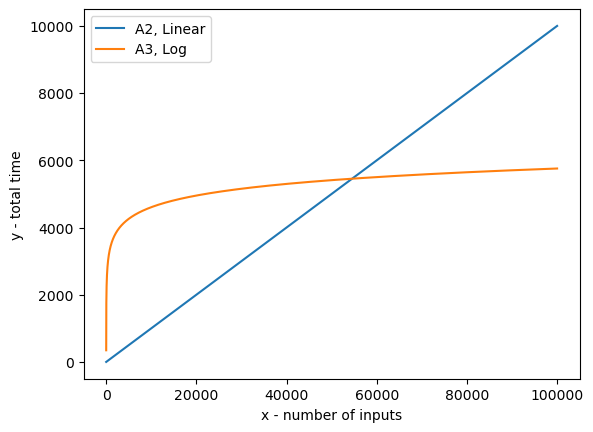

In [181]:
# Task 6
# A2 linear search, M1 speed ratio: c1 = 0.1
# A3 binary search, M2 speed ratio: c2 = 500
# T(n) = c * n
# M1 T(n) = 0.1 * n
# M2 T(n) = 500 * n

def a2(num):
    return 0.1 * num
# Binary search (best case) log(n)
def a3(num):
    return 500 * LOG_N(num)

# Ugly code incoming, just because I can
def bruteForceTask6():
    xLine = []
    A2List = []
    A3List = []
    for n in range(2, 100000):
        A2 = a2(n)
        A3 = a3(n)
        xLine.append(n)
        A2List.append(A2)
        A3List.append(A3)
        if A2/10 >= A3:
            print("Lower number means lower runtime")
            print("A2:", bigNumberConv(A2))
            print("A3:", bigNumberConv(A3))
            print("A3 is faster or equally fast as A2 after n =", n)
            break

    plt.plot(xLine, A2List, label = "A2, Linear")
    plt.plot(xLine, A3List, label = "A3, Log")
    plt.xlabel('x - number of inputs')
    plt.ylabel('y - total time')
    plt.legend()
    plt.show()

bruteForceTask6()


# As the graph shows, it is best to use the A2 algorithm in the first 54533 inputs.
# After that it makes more sense using the A3 algorithm and M2.
# However, the best would be to use the A3 algorithm on the M1
# You can test this by making the A3 return 0.1 * LOG_N(num)

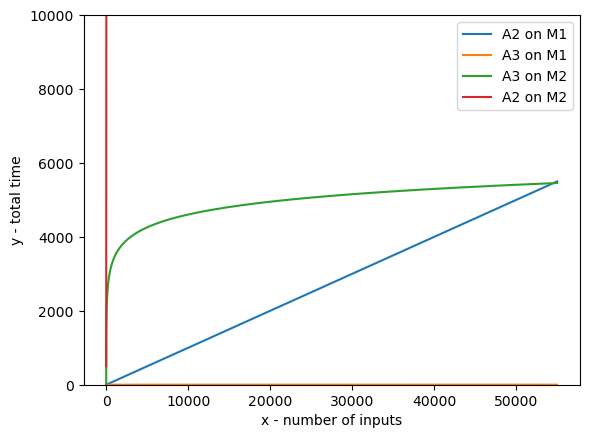

In [205]:
# Normally I would use the pascalCase naming convention as I formerly have coded alot in ASP.NET
# Now this is changed to snake_case to make it a little easier to read
# This class is made to simplify the former codeblock, and make it reusable with lambdas
class Algorithm:
    def __init__(self, run_time_function, speed_ratio):
        self.run_time_function = run_time_function
        self.speed_ratio = speed_ratio

    def run(self, n):
        return self.speed_ratio * self.run_time_function(n)

    @staticmethod
    def predefinedMachines():
        m1 = Algorithm(lambda n: n, 0.1)
        a3_on_m1 = Algorithm(lambda n: LOG_N(n), 0.1)

        m2 = Algorithm(lambda n: LOG_N(n), 500)
        a2_on_m2 = Algorithm(lambda n: n, 500)

        n = range(1, 55000)
        m1_times = [m1.run(i) for i in n]
        a3_m1_times = [a3_on_m1.run(i) for i in n]

        m2_times = [m2.run(i) for i in n]
        a2_m2_times = [a2_on_m2.run(i) for i in n]

        plt.plot(n, m1_times, label="A2 on M1")
        plt.plot(n, a3_m1_times, label="A3 on M1")

        plt.plot(n, m2_times, label="A3 on M2")
        plt.plot(n, a2_m2_times, label="A2 on M2")
        plt.xlabel('x - number of inputs')
        plt.ylabel('y - total time')
        plt.ylim([0, 10000])
        plt.legend()
        plt.show()

Algorithm.predefinedMachines()

7. You’ve been asked to adapt some code that maintains a record about each planet and their moons in a solar system like ours into a system that will store a record about every planet and moon in every known galaxy. The record structure will be a little larger for each planet to hold some new attributes. It’s likely that the records will be added and updated “randomly” as telescopes and  other  sensors  point  at  different  parts  of  the  universe  over  time,  filling  in  some  initial attributes of the records, and then updating others during frequent observations. The current code uses an unordered array for the records. Would you recommend any changes? If so, why? (10 points)

Task 7 Answer:
In 2021 it was estimated to be around 2 trillion (short scale) galaxies in the observable universe. In the Milky Way there is 3916 solar systems with confirmed 5241 confirmed exoplanets that we know of. In our solar system there are 8 planets and 179 moons, averaging 22.375 moons per planet. So if every solar system in each galaxy at least had the same amount of solar systems, planets and moons it will be ``2*3916*(8+179)``= 1,464,584 trillion natural satellites.

With this in mind I would highly recommend to change the code to use a B-Tree (50-80% reduction of memory compared to Red-Black Tree - that itself is also quite good).
A B-Tree has the worst case time complexity of log(n), making it perfect for big datasets. Now most databases uses this already in some way, such as MySQL and PostgreSQL.


In [147]:
# Ignore everything from here and down
# Reversal of string, slice and loop
def reverseStringSlice(text):
    return text[::-1]

def reverseStringLoop(text):
    temp = ""
    for i in range(-1, -(len(text)+1), -1):
        temp += text[i]
    return temp


print(reverseStringLoop("Cookiemonster"))
print(reverseStringSlice("This is interesting"))

retsnomeikooC
gnitseretni si sihT


In [148]:
# Bonus stuff from lecture (08.02.2023) - dd.mm.yyyy
# Node ofc
class Node:
    def __init__(self, data = None, next = None):
        self.data = data
        self.next = next

In [149]:
# Linked list example
class LinkedList:
    def __init__(self):
        self.head = None

    # Insertion method
    def insert(self, data):
        newNode = Node(data)
        if self.head:
            current = self.head
            while current.next:
                current = current.next
            current.next = newNode
        else:
            self.head = newNode

    def delete(self, dataToDelete):
        current = self.head
        if current is not None:
            if current.data == dataToDelete:
                self.head = current.next
                del current
                return
        prev = None
        while current is not None:
            if current.data == dataToDelete:
                break
            prev = current
            current = current.next
        if current is None:
            return
        prev.next = current.next
        del current

    def printOneByOne(self):
        current = self.head
        while current:
            print(current.data)
            current = current.next

    def printAllAsList(self):
        current = self.head
        temp = []
        while current:
            temp.append(current.data)
            current = current.next
        print(temp)

In [150]:
LL = LinkedList()
LL.insert("cake")
LL.insert(4)
LL.insert(5)
LL.printOneByOne()
print() # Just some space

LL.delete("cake") # You can try to change this to 4 or 5, still works
LL.printAllAsList()

cake
4
5

[4, 5]


In [151]:
# Bonus code, no longer task submission
# A class of card that I made because I was bored
class Card:
    def __init__(self, valor, number):
        self.valor = valor
        self.number = number

    def pValor(self):
        return self.valor

    def pNumber(self):
        return self.number

    def pCard(self):
        return str(self.valor) + " " + str(self.number)

In [152]:
import random
# A class meant to hold a stack of the class "Card", hence the name:
class StackOfCards:
    def __init__(self):
        self.stack = []
        self.cardCount = 0
        valor = ["Kløver", "Hjerter", "Ruter", "Spar"]
        for val in valor:
            for num in range(1, 14):
                self.cardCount += 1
                self.stack.append(Card(val, num))
                #print(val + " " + str(num) + " was created")
        print("A stack of", self.cardCount, "cards were created")

    def getStack(self):
        return self.stack

    def printStack(self):
        for card in self.stack:
            print(card.pCard())

    def shuffleStack(self):
        print("")
        print("Shuffling cards…")
        for i in range(0, 360): # Higher range means more shuffling
            rnd = random.randint(0, 51)
            rnd2 = random.randint(0, 51)
            if rnd == rnd2:
                continue
            self.__swapIndex(rnd, rnd2)

    def __swapIndex(self, index1, index2):  # "Private" method
        temp = self.stack[index1]
        self.stack[index1] = self.stack[index2]
        self.stack[index2] = temp

In [153]:
StackOfCardsVariable = StackOfCards()
StackOfCardsVariable.printStack()
StackOfCardsVariable.shuffleStack()
StackOfCardsVariable.printStack()

A stack of 52 cards were created
Kløver 1
Kløver 2
Kløver 3
Kløver 4
Kløver 5
Kløver 6
Kløver 7
Kløver 8
Kløver 9
Kløver 10
Kløver 11
Kløver 12
Kløver 13
Hjerter 1
Hjerter 2
Hjerter 3
Hjerter 4
Hjerter 5
Hjerter 6
Hjerter 7
Hjerter 8
Hjerter 9
Hjerter 10
Hjerter 11
Hjerter 12
Hjerter 13
Ruter 1
Ruter 2
Ruter 3
Ruter 4
Ruter 5
Ruter 6
Ruter 7
Ruter 8
Ruter 9
Ruter 10
Ruter 11
Ruter 12
Ruter 13
Spar 1
Spar 2
Spar 3
Spar 4
Spar 5
Spar 6
Spar 7
Spar 8
Spar 9
Spar 10
Spar 11
Spar 12
Spar 13

Shuffling cards…
Hjerter 7
Kløver 11
Spar 13
Hjerter 13
Hjerter 4
Spar 8
Spar 2
Ruter 7
Kløver 9
Spar 3
Ruter 12
Ruter 3
Ruter 4
Hjerter 6
Spar 1
Kløver 8
Spar 7
Ruter 10
Kløver 2
Kløver 10
Kløver 13
Kløver 7
Hjerter 10
Ruter 2
Ruter 11
Hjerter 11
Hjerter 2
Hjerter 5
Kløver 4
Hjerter 1
Ruter 6
Spar 9
Kløver 12
Kløver 1
Spar 11
Spar 5
Hjerter 9
Ruter 8
Ruter 9
Hjerter 3
Ruter 5
Kløver 3
Spar 4
Ruter 13
Kløver 6
Kløver 5
Hjerter 8
Spar 12
Spar 6
Ruter 1
Hjerter 12
Spar 10
